<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Flkr_g_5_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [ ]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 34.9 MB/s 
     |████████████████████████████████| 41 kB 173 kB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 4.5 MB 51.4 MB/s 
     |████████████████████████████████| 832 kB 43.1 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 50.3 MB/s 


# **Import**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel
import seaborn as sb

matplotlib.rcParams['figure.figsize'] = (15,8)
sb.set_style('darkgrid')

# code


In [ ]:
df = pd.read_csv('kepler_quarter_9.csv')

In [ ]:
df_test = df[5000:10000]

In [ ]:
flr_list = []
logg_list = []
for id in df_test['Dataset Name']:
  name    = id[:13]
  source  = lk.search_lightcurve(name, author="Kepler", cadence="long",quarter = 9).download()
  rem_out = source.remove_outliers(sigma_upper = 2.5).normalize()

  pg      = rem_out.to_periodogram(normalization='psd')
  seismo  = pg.flatten().to_seismology() 
  seismo.estimate_numax() 
  logg = seismo.estimate_logg()

  logg_list.append(logg.value)   


  index=50
  ind=250            
  flux    = rem_out.flux.value
  time    = rem_out.time.value
  smoothed_signal = convolve(flux, Box1DKernel(16))
  flkr    = flux[index:-ind]-smoothed_signal[index:-ind]
  flr     = np.sqrt(np.mean(flkr**2))*1e3

  flr_list.append(flr)

/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1058: LightkurveWarning: The light curve has a negative median flux (-1.69e+03 electron / s); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  LightkurveWarning,


In [ ]:
flkr_g=pd.DataFrame(zip(flr_list, df_test['Log G'].values), columns=['Flkr','Log G'])
flkr_g_pone = flkr_g[flkr_g['Flkr']<0.1]
flkr_g_pone

,Flkr,Log G
102,0.076270,4.129
222,0.099596,4.444
225,0.088127,4.510
303,0.095215,4.248
308,0.083849,3.936
...,...,...
4722,0.089536,4.337
4745,0.084454,4.527
4759,0.092164,4.336
4768,0.085468,4.199


In [ ]:
flkr_g_pone.to_csv('f8_g_5kto10k_<0.1.csv')

In [ ]:
df_test['flicker']= flr_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
flkr_g.to_csv('f8_g_5kto10k.csv')
flkr_g

,Flkr,Log G
0,0.395501,4.403
1,0.250597,4.938
2,0.670387,4.664
3,0.358187,4.600
4,0.364120,4.107
...,...,...
4995,0.322820,4.664
4996,0.473020,4.688
4997,0.249507,4.653
4998,0.258094,4.725


(5.2, 2.0)

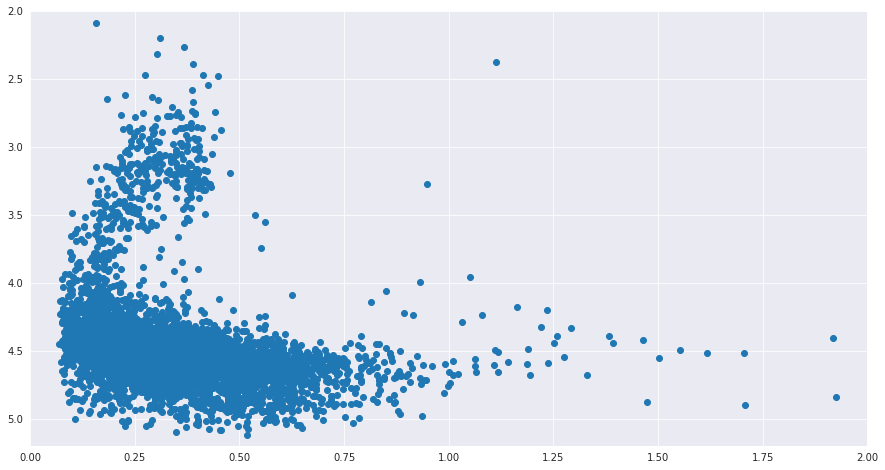

In [ ]:
x = df_test['flicker']
y = df_test['Log G']

plt.scatter(x,y)
plt.xlim(0,2)
plt.ylim(5.2, 2)

(5.0, 3.5)

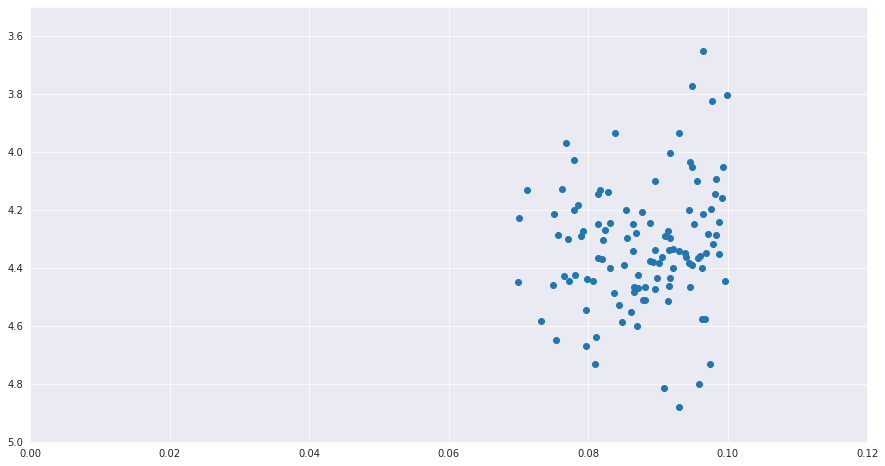

In [ ]:
x = flkr_g_pone['Flkr']
y = flkr_g_pone['Log G']

plt.scatter(x,y)
plt.xlim(0,.12)
plt.ylim(5,3.5)